In [1]:
import pandas as pd
import copy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.compose import make_column_transformer
import category_encoders as ce
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
#-------------------------------------------------------------

In [2]:
mainpath='https://raw.githubusercontent.com/RudraRudra123/Predict_Order_Qty_Changes/master/Data/'
eso_dataset = pd.read_csv(mainpath+'Predictive%20Modelling%20-%20Data%20file-Train.csv')

In [3]:
eso_dataset.head(5)

,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,retail_price,replenishment_unit_cost,forecast_start_date,forecast_end_date,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity
0,1,1/2/2017,Monday,s1,50,28483,c654,0,0.625000,16,2.60,18.56,1/2/2017,1/8/2017,8.50,2,48,2,1,1.0
1,2,1/2/2017,Monday,s1,50,40917,c896,0,0.125000,8,2.95,11.28,1/2/2017,1/8/2017,1.95,2,20,2,1,1.0
2,3,1/2/2017,Monday,s1,50,136366,c896,0,0.833333,6,2.50,4.76,1/2/2017,1/8/2017,0.80,5,40,2,1,2.0
3,4,1/2/2017,Monday,s1,50,136344,c762,0,0.375000,8,3.95,15.04,1/2/2017,1/8/2017,1.55,2,20,2,1,1.0
4,5,1/2/2017,Monday,s1,50,136078,c672,0,0.750000,4,2.80,4.56,1/2/2017,1/8/2017,1.15,2,12,2,1,1.0


In [4]:
eso_dataset.columns

Index(['id', 'order_date', 'order_day_of_week', 'store', 'supplier_id',
       'product_id', 'category', 'on_order_quantity', 'on_hand_quantity',
       'product_case_pack', 'retail_price', 'replenishment_unit_cost',
       'forecast_start_date', 'forecast_end_date', 'Ao_Forecast_Quantity',
       'Minimum_Order_Quantity', 'Maximum_Order_Quantity', 'lead_time',
       'suggested_order_quantity', 'actual_order_quantity'],
      dtype='object')

In [5]:
eso_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19668 entries, 0 to 19667
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19668 non-null  int64  
 1   order_date                19668 non-null  object 
 2   order_day_of_week         19668 non-null  object 
 3   store                     19668 non-null  object 
 4   supplier_id               19668 non-null  int64  
 5   product_id                19668 non-null  int64  
 6   category                  19668 non-null  object 
 7   on_order_quantity         19668 non-null  int64  
 8   on_hand_quantity          19668 non-null  float64
 9   product_case_pack         19668 non-null  int64  
 10  retail_price              19668 non-null  float64
 11  replenishment_unit_cost   19668 non-null  float64
 12  forecast_start_date       19668 non-null  object 
 13  forecast_end_date         19668 non-null  object 
 14  Ao_For

In [6]:
print('Week day unique values:', eso_dataset.order_day_of_week.unique())
print('store unique values', eso_dataset.store.unique())

Week day unique values: ['Monday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Tuesday' 'Sunday']
store unique values ['s1' 's2']


In [7]:
store_data = cp.deepcopy(eso_dataset)

### Set Date Field types to Date fields

In [8]:
store_data[['order_date', 'forecast_start_date', 'forecast_end_date']][0:5]

,order_date,forecast_start_date,forecast_end_date
0,1/2/2017,1/2/2017,1/8/2017
1,1/2/2017,1/2/2017,1/8/2017
2,1/2/2017,1/2/2017,1/8/2017
3,1/2/2017,1/2/2017,1/8/2017
4,1/2/2017,1/2/2017,1/8/2017


In [9]:
store_data.order_date = pd.to_datetime(store_data.order_date)
store_data.forecast_start_date = pd.to_datetime(store_data.forecast_start_date)
store_data.forecast_end_date = pd.to_datetime(store_data.forecast_end_date)

In [10]:
store_data[['order_date', 'forecast_start_date', 'forecast_end_date']][0:5]

,order_date,forecast_start_date,forecast_end_date
0,2017-01-02,2017-01-02,2017-01-08
1,2017-01-02,2017-01-02,2017-01-08
2,2017-01-02,2017-01-02,2017-01-08
3,2017-01-02,2017-01-02,2017-01-08
4,2017-01-02,2017-01-02,2017-01-08


### Check if there are nulls:

In [11]:
store_data.columns[store_data.isnull().any()].tolist()

[]

#### There are no NULLS in the dataframe

In [12]:
print('Before changes to pack size')
store_data.head(5)

Before changes to pack size


,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,retail_price,replenishment_unit_cost,forecast_start_date,forecast_end_date,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity
0,1,2017-01-02,Monday,s1,50,28483,c654,0,0.625000,16,2.60,18.56,2017-01-02,2017-01-08,8.50,2,48,2,1,1.0
1,2,2017-01-02,Monday,s1,50,40917,c896,0,0.125000,8,2.95,11.28,2017-01-02,2017-01-08,1.95,2,20,2,1,1.0
2,3,2017-01-02,Monday,s1,50,136366,c896,0,0.833333,6,2.50,4.76,2017-01-02,2017-01-08,0.80,5,40,2,1,2.0
3,4,2017-01-02,Monday,s1,50,136344,c762,0,0.375000,8,3.95,15.04,2017-01-02,2017-01-08,1.55,2,20,2,1,1.0
4,5,2017-01-02,Monday,s1,50,136078,c672,0,0.750000,4,2.80,4.56,2017-01-02,2017-01-08,1.15,2,12,2,1,1.0


In [21]:
#Converting data columns into Pack size 
def topacksize(store_data):
    store_data.Ao_Forecast_Quantity   = store_data.Ao_Forecast_Quantity/store_data.product_case_pack
    store_data.Minimum_Order_Quantity = store_data.Minimum_Order_Quantity/store_data.product_case_pack
    store_data.Maximum_Order_Quantity = store_data.Maximum_Order_Quantity/store_data.product_case_pack
    return store_data

## Inspect category variables

In [ ]:
for index, column in enumerate(['order_day_of_week','store','supplier_id','category',]):
  # print(column)
  print(column,':   ',store_data[column].unique())

print('\n other variable is product_id, not printed here as the list is big')
print('total number of unique products:', len(pd.unique(store_data['product_id'])))

## Visual Interpretatin

In [ ]:
matrix = store_data.corr() 
f, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="OrRd");

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(data=store_data, x="order_date", y="suggested_order_quantity")
sns.lineplot(data=store_data, x="order_date", y="actual_order_quantity",ci=None)

In [ ]:
store_data_visualize = pd.DataFrame()
plt.figure(figsize=(25,8))
sns.set_style('whitegrid')
store_data_visualize['order_qty_deviation'] = store_data['actual_order_quantity'] - store_data['suggested_order_quantity']
store_data_visualize['order_date'] = store_data['order_date']
sns.lineplot(data=store_data_visualize, x="order_date", y ='order_qty_deviation', ci=None)

#### Observation: Adjustments are on both sides. Amendments to order quantity is a frequent activity 

In [22]:
topacksize(store_data)

,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,retail_price,replenishment_unit_cost,forecast_start_date,forecast_end_date,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity
0,1,2017-01-02,Monday,s1,50,28483,c654,0,0.625000,16,2.60,18.56,2017-01-02,2017-01-08,0.531250,0.125000,3.000000,2,1,1.0
1,2,2017-01-02,Monday,s1,50,40917,c896,0,0.125000,8,2.95,11.28,2017-01-02,2017-01-08,0.243750,0.250000,2.500000,2,1,1.0
2,3,2017-01-02,Monday,s1,50,136366,c896,0,0.833333,6,2.50,4.76,2017-01-02,2017-01-08,0.133333,0.833333,6.666667,2,1,2.0
3,4,2017-01-02,Monday,s1,50,136344,c762,0,0.375000,8,3.95,15.04,2017-01-02,2017-01-08,0.193750,0.250000,2.500000,2,1,1.0
4,5,2017-01-02,Monday,s1,50,136078,c672,0,0.750000,4,2.80,4.56,2017-01-02,2017-01-08,0.287500,0.500000,3.000000,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19663,19664,2018-06-28,Thursday,s2,50,136340,c2052,1,2.000000,4,5.95,9.36,2018-06-28,2018-07-04,1.900000,1.500000,3.000000,3,1,1.0
19664,19665,2018-06-28,Thursday,s2,50,112932,c770,0,1.400000,10,3.50,13.90,2018-06-28,2018-07-04,1.113333,0.400000,2.000000,3,1,1.0
19665,19666,2018-06-28,Thursday,s2,50,32944,c790,2,3.625000,8,3.95,8.24,2018-06-28,2018-07-04,5.270833,0.500000,2.500000,3,1,1.0
19666,19667,2018-06-28,Thursday,s2,50,143930,c676,0,0.000000,6,2.90,7.26,2018-06-28,2018-07-04,0.500000,0.666667,2.000000,3,2,2.0


## Outlier Analysis

In [23]:
#Backing up the existing table and performing Outlier Analysis on following columns
store_data_Outlier = store_data
store_data_Outlier

,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,retail_price,replenishment_unit_cost,forecast_start_date,forecast_end_date,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity
0,1,2017-01-02,Monday,s1,50,28483,c654,0,0.625000,16,2.60,18.56,2017-01-02,2017-01-08,0.531250,0.125000,3.000000,2,1,1.0
1,2,2017-01-02,Monday,s1,50,40917,c896,0,0.125000,8,2.95,11.28,2017-01-02,2017-01-08,0.243750,0.250000,2.500000,2,1,1.0
2,3,2017-01-02,Monday,s1,50,136366,c896,0,0.833333,6,2.50,4.76,2017-01-02,2017-01-08,0.133333,0.833333,6.666667,2,1,2.0
3,4,2017-01-02,Monday,s1,50,136344,c762,0,0.375000,8,3.95,15.04,2017-01-02,2017-01-08,0.193750,0.250000,2.500000,2,1,1.0
4,5,2017-01-02,Monday,s1,50,136078,c672,0,0.750000,4,2.80,4.56,2017-01-02,2017-01-08,0.287500,0.500000,3.000000,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19663,19664,2018-06-28,Thursday,s2,50,136340,c2052,1,2.000000,4,5.95,9.36,2018-06-28,2018-07-04,1.900000,1.500000,3.000000,3,1,1.0
19664,19665,2018-06-28,Thursday,s2,50,112932,c770,0,1.400000,10,3.50,13.90,2018-06-28,2018-07-04,1.113333,0.400000,2.000000,3,1,1.0
19665,19666,2018-06-28,Thursday,s2,50,32944,c790,2,3.625000,8,3.95,8.24,2018-06-28,2018-07-04,5.270833,0.500000,2.500000,3,1,1.0
19666,19667,2018-06-28,Thursday,s2,50,143930,c676,0,0.000000,6,2.90,7.26,2018-06-28,2018-07-04,0.500000,0.666667,2.000000,3,2,2.0


35

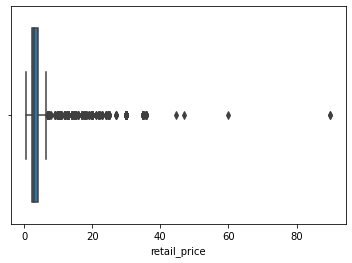

In [24]:
# Retail Price Outlier
(sns.boxplot(x=store_data_Outlier['retail_price']))
#print('Count of Outliers on retail_price: ')
len(store_data.query("retail_price>30"))

## Doesnt look like an Outlier, there could be Expensive products as well  -- > So , Normalizing this

<AxesSubplot:xlabel='replenishment_unit_cost'>

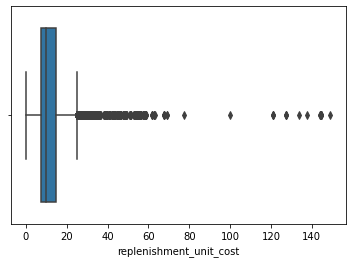

In [25]:
# Replinishment unit cost Outlier
sns.boxplot(x=store_data_Outlier['replenishment_unit_cost'])
#print('Count of Outliers on replenishment_unit_cost: ')
      #len(store_data.query("replenishment_unit_cost>30"))

## Doesnt look like an Outlier, there could be Expensive products as well  -- > So , Normalizing this

<AxesSubplot:xlabel='Ao_Forecast_Quantity'>

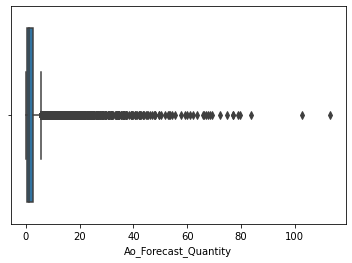

In [26]:
# Forecast Qty Outlier
sns.boxplot(x=store_data_Outlier['Ao_Forecast_Quantity'])
#print('Count of Outliers on Ao_Forecast_Quantity : ')
      #len(store_data.query("replenishment_unit_cost>30"))

Count of Outliers on on_hand_quantity : 


0

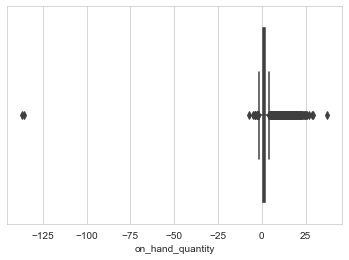

In [99]:
#Onhand
onhand_outlier = store_data
sns.boxplot(x=store_data_Outlier['on_hand_quantity'])
print('Count of Outliers on on_hand_quantity : ')
len(store_data.query("on_hand_quantity<-125"))

In [100]:
store_data.drop(store_data[store_data['on_hand_quantity'] < -125].index, inplace = True)

0

In [40]:
# Dropping Redundant rows which may cause issue while LocalOutlierFactor 

store_data_Outlier= store_data_Outlier.drop(['id','order_date','order_day_of_week','store','supplier_id','product_id','category','product_case_pack',
                        'forecast_start_date','forecast_end_date','Minimum_Order_Quantity','Maximum_Order_Quantity','lead_time'],axis=1)
store_data_Outlier

,on_order_quantity,on_hand_quantity,retail_price,replenishment_unit_cost,Ao_Forecast_Quantity,suggested_order_quantity,actual_order_quantity
0,0,0.625000,2.60,18.56,0.531250,1,1.0
1,0,0.125000,2.95,11.28,0.243750,1,1.0
2,0,0.833333,2.50,4.76,0.133333,1,2.0
3,0,0.375000,3.95,15.04,0.193750,1,1.0
4,0,0.750000,2.80,4.56,0.287500,1,1.0
...,...,...,...,...,...,...,...
19663,1,2.000000,5.95,9.36,1.900000,1,1.0
19664,0,1.400000,3.50,13.90,1.113333,1,1.0
19665,2,3.625000,3.95,8.24,5.270833,1,1.0
19666,0,0.000000,2.90,7.26,0.500000,2,2.0


In [61]:
store_data_Outlier= store_data_Outlier.drop(['retail_price','replenishment_unit_cost'],axis=1)

KeyError: "['retail_price' 'replenishment_unit_cost'] not found in axis"

In [62]:
#Applying LOF
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(store_data_Outlier)
store_data_Outlier1 = pd.DataFrame(store_data_Outlier)
store_data_Outlier1 = store_data_Outlier1.assign(Outlier=[1 if val ==-1 else 0 for val in yhat])
#store_data_Outlier1
len(store_data_Outlier1.query("Outlier==1"))

796

In [ ]:
## Outliers identified are 796 mostly due to the Forecast column hence, we are normalizing it.

## Feature Engineering

In [ ]:
store_data_bkp = cp.deepcopy(store_data)

In [ ]:
store_data = cp.deepcopy(store_data_bkp)

,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,retail_price,replenishment_unit_cost,forecast_start_date,forecast_end_date,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity
18,19,2017-01-04,Wednesday,s1,50,136081,c672,0,-0.250000,4,2.80,4.5600,2017-01-04,2017-01-11,0.750000,0.500000,3.000000,2,2,1.0
32,33,2017-01-05,Thursday,s1,30,113126,c781,0,-0.250000,4,4.95,7.3481,2017-01-05,2017-01-10,5.250000,1.000000,7.500000,1,7,4.0
53,54,2017-01-06,Friday,s1,50,136081,c672,1,-0.250000,4,2.80,4.5600,2017-01-06,2017-01-13,0.675000,0.500000,3.000000,3,1,1.0
134,135,2017-01-09,Monday,s1,50,140198,c762,0,-0.200000,10,3.50,16.8000,2017-01-09,2017-01-15,0.260000,0.000000,0.100000,3,1,1.0
175,176,2017-01-13,Friday,s1,50,100909,c770,1,-0.333333,6,2.50,5.9400,2017-01-13,2017-01-20,0.783333,0.500000,8.333333,3,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18840,18841,2018-05-24,Thursday,s2,40,157975,c891,0,-0.458333,24,1.90,15.5200,2018-05-24,2018-06-05,0.623864,0.000000,0.041667,4,1,1.0
18977,18978,2018-05-29,Tuesday,s2,50,143933,c896,1,-0.375000,8,3.70,14.4800,2018-05-29,2018-06-04,0.662500,0.500000,1.500000,2,1,1.0
19249,19250,2018-06-10,Sunday,s2,50,1059,c669,1,-0.111111,9,1.95,6.7500,2018-06-10,2018-06-15,0.662963,0.444444,1.333333,2,1,1.0
19306,19307,2018-06-14,Thursday,s2,40,157975,c891,0,-0.500000,24,1.90,15.5200,2018-06-14,2018-06-26,1.240855,1.000000,2.000000,4,2,2.0


<AxesSubplot:xlabel='order_date', ylabel='on_hand_quantity'>

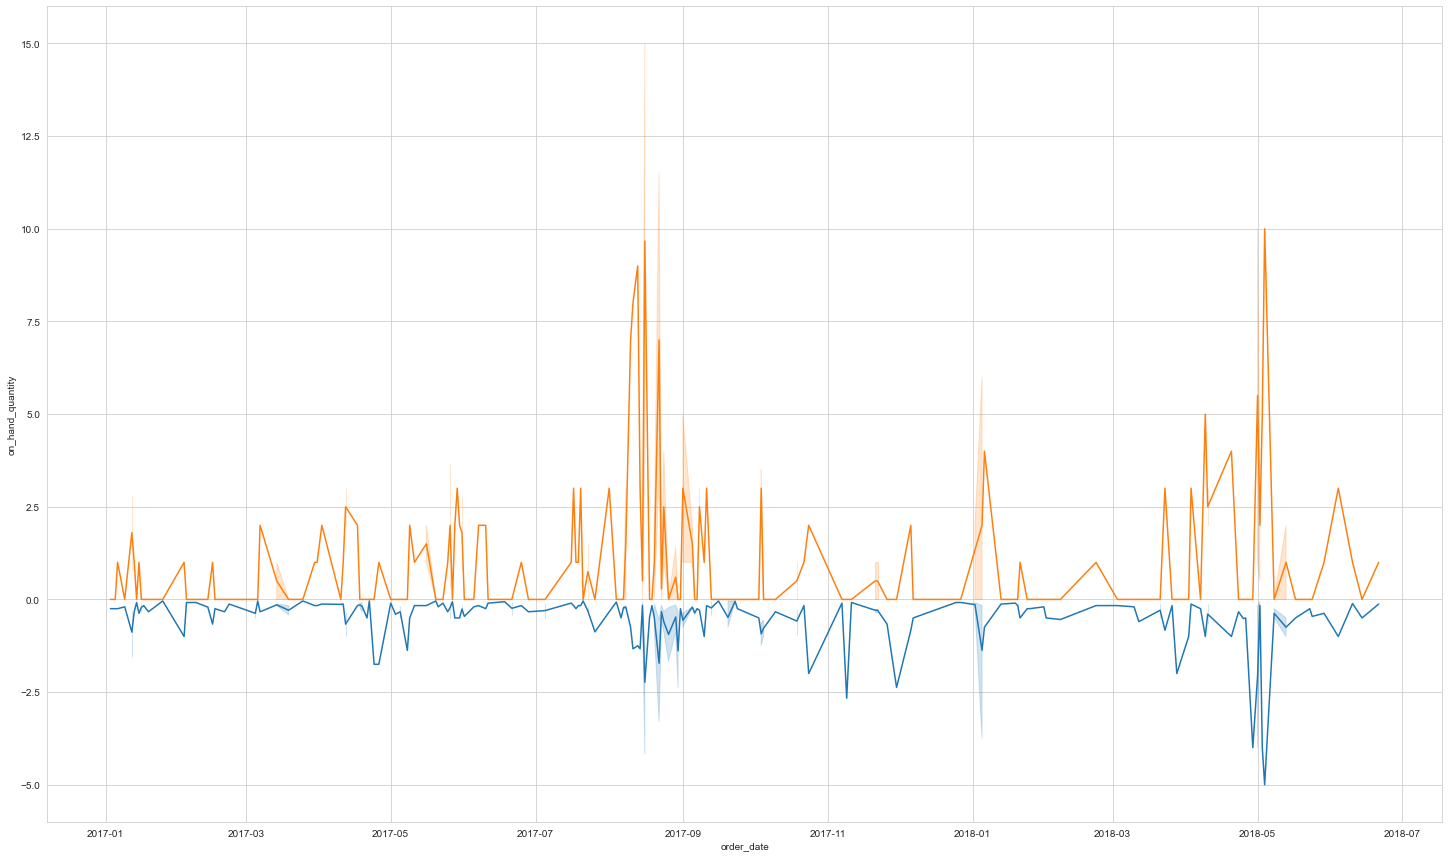

In [101]:
neg_onhand = store_data.query("on_hand_quantity<0")
plt.figure(figsize=(25,15))
#plt.subplots(ncols=1)
sns.set_style('whitegrid')
#sns.lineplot(data=neg_onhand, x="product_id", y="on_hand_quantity","on_order_quantity" )
sns.lineplot(x='order_date', y='on_hand_quantity', data=neg_onhand)
sns.lineplot(x='order_date', y='on_order_quantity', data=neg_onhand)

In [68]:
# Create new features
def creatNewFeatures(data):
  data['balance'] = data['on_hand_quantity'] + data['on_order_quantity']
  data['year'] = data['order_date'].dt.year
  data['month'] = data['order_date'].dt.month
  data['day'] = data['order_date'].dt.day
  return data

In [ ]:
def typeconversion(data):

  # change date fields to date_format_fields
  data.order_date = pd.to_datetime(data.order_date)
  data.forecast_start_date = pd.to_datetime(data.forecast_start_date)
  data.forecast_end_date = pd.to_datetime(data.forecast_end_date)
  data = data.astype({"order_day_of_week":'category',"store":'category',"supplier_id":'category',"category":'category', "product_id": 'category', "year": 'category',"month": 'category', "day": 'category'})
  data = data.astype({"suggested_order_quantity": 'int', "actual_order_quantity": 'int', "Minimum_Order_Quantity": 'int', "Maximum_Order_Quantity":'int',
                      "on_order_quantity": 'int', "product_case_pack": 'int', "lead_time": 'int'})
  data = data.astype({"on_hand_quantity": 'float', "retail_price": 'float', "Ao_Forecast_Quantity": 'float',"replenishment_unit_cost": 'float'})
  data.info()
  return data

In [ ]:
# Target Encoding for categorical features
def encoding_features(data):
    y = data['actual_order_quantity']
    categorical_cols = ['order_day_of_week','store','supplier_id', 'category', 'year', 'month', 'day']
    #Create target encoding object
    encoder=ce.TargetEncoder(cols=categorical_cols) 
    data= encoder.fit_transform(data, y)
    # for col in categorical_cols:
    #     # encoder=ce.TargetEncoder(cols=col) 
    #     data[col] = encoder.fit_transform(data[col], y)
    return data

In [ ]:
# drop unnecessary features and createFinalDataSet
# Onhand and OnOrde clubbed to be Balance
def createFinalDataSet(data): 
    data = data.drop(['id', 'product_id','forecast_start_date', 'forecast_end_date', 'on_hand_quantity', 'on_order_quantity'], axis=1)
    return data

In [ ]:
scaler_target = MinMaxScaler(feature_range = (0, 1))
scaler_input = MinMaxScaler(feature_range = (0, 1))

In [ ]:
#normalize dataset
def minMaxNormalization_input(data):
    global scaler_input
    for col in data.columns:
        if col != 'actual_order_quantity':
        # scalar_variable = MinMaxScaler(feature_range = (0,1))
          data[[col]] = scaler_input.fit_transform(data[[col]])
    return data

In [ ]:
#normalize Target
def minMaxNormalization_target(data):
    global scaler_target
    data[['actual_order_quantity']] = scaler_target.fit_transform(data[['actual_order_quantity']])
    return data

In [ ]:
store_data = creatNewFeatures(store_data)
store_data = typeconversion(store_data)
print('store data after type conversion')
store_data.head(5)

In [ ]:
store_data.to_csv('store-data-before-encoding.csv')
store_data = encoding_features(store_data)

In [ ]:
store_data = createFinalDataSet(store_data)

In [ ]:
print('Datset after removing unnecessary feature') 
store_data.head(5)

In [ ]:
store_data.to_csv('final-dataset-before-normalized.csv')
store_data = minMaxNormalization_input(store_data)
store_data = minMaxNormalization_target(store_data)

In [ ]:
store_data.to_csv('final-dataset-Normalized.csv')
print('store data after normailzation')
store_data.head(5)